## Question:-

- Use the provided dataset to train your model, utilizing the entire dataset as the training set

**Objective:**

To build a binary classification model using the dataset provided. The dataset consists of anonymized features named `feature_0` to `feature_48`, and the class label is stored in the target column.

The goal is to train a model that generalizes well to unseen data. Your model will be evaluated
on a hidden test set that we will use internally to assess your solution.


**Dataset:**

A CSV file containing the following:
- *feature_0 to feature_48*: 49 numerical features.
- *target*: Binary class label (0 or 1).

----------------------------

##  Important:-

To check what has been done as part of the pre-processing step, refer to the `dataloader.py`. As this notebook is created just to experiment first and then decide what transformations to apply, there are a lot of trial and error steps here. So, to view what exactly has been done to the data, refer to the `dataloader.py`

However, if you want to understand the motivation behind each and every step, refer to this notebook.

## Solution:-

1. The standard approach to start with any dataset is to analyze the data, check dataset size abd distribution, check categorical and numerical features, fill/remove missing values, pre-process it, dimensionality reduction, add extra (or calculated features) if needed, do correlation analysis between different features and also with the target variable, perform feature selection etc.
2. After all these pre-processing and analysis has been done, we move on with the model fitting, model training followed by inference on unseen data

#### Load all the important libraries and the data path
**Note:**
Please modify the `DATA_PATH` present in the `.env` inside the Config folder according to your system..

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv


#   Load the Data path
env_path = Path(os.getcwd()).parent / 'Config' / '.env'
load_dotenv(env_path)

DATA_PATH = os.getenv('DATA_PATH')

In [2]:
#   We can clearly see here that the dataset has 2188 rows and 50 columns in total

df = pd.read_csv(DATA_PATH)
print(f"Shape: {df.shape}")
print(f"Columns present in the dataset: {df.columns}")

Shape: (2188, 50)
Columns present in the dataset: Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'target'],
      dtype='object')


In [3]:
df.duplicated().any()

np.False_

In [4]:
#   Check for missing values

#   Running the cell, we can easily observe that some of the features do have missing values present in them:
#   They are: [feature_2, feature_12, feature_15, feature_17, feature_20]


# print(df.isna().sum())

missing_val = {}
for col_name, val in df.isna().sum().items():
    if val > 0:
        missing_val[col_name] = val

print(missing_val)

{'feature_2': 84, 'feature_12': 12, 'feature_15': 798, 'feature_17': 365, 'feature_20': 1927}


In [5]:
#   Check for categorical columns, using the unique values present for each column 
for col in df.columns:
    print(f"Column: {col}, and unique values: {df[col].value_counts().shape}")

Column: feature_0, and unique values: (2179,)
Column: feature_1, and unique values: (2104,)
Column: feature_2, and unique values: (2054,)
Column: feature_3, and unique values: (207,)
Column: feature_4, and unique values: (2080,)
Column: feature_5, and unique values: (11,)
Column: feature_6, and unique values: (1284,)
Column: feature_7, and unique values: (447,)
Column: feature_8, and unique values: (62,)
Column: feature_9, and unique values: (2105,)
Column: feature_10, and unique values: (451,)
Column: feature_11, and unique values: (199,)
Column: feature_12, and unique values: (606,)
Column: feature_13, and unique values: (39,)
Column: feature_14, and unique values: (9,)
Column: feature_15, and unique values: (1289,)
Column: feature_16, and unique values: (12,)
Column: feature_17, and unique values: (1617,)
Column: feature_18, and unique values: (2,)
Column: feature_19, and unique values: (4,)
Column: feature_20, and unique values: (238,)
Column: feature_21, and unique values: (616,)


In [6]:
#   Majority of the columns have unique values either below 100 or above 1500. 
#   They form the categorical and numerical features respectively (as there are 2188 rows in total)


#   Here we check the categorical columns
threshold = 100
cat_columns = []

for col in df.columns:
    if df[col].value_counts().shape[0] <= threshold:
        cat_columns.append( (df[col].value_counts().shape[0], col) )
        print(f"Column: {col}, and unique values: {df[col].value_counts().shape}")


print('-'*60)
print()
print(sorted(cat_columns))

print('-'*60)
print()

#   For every categorical column, we also check how many missing values are present

for val, col_name in sorted(cat_columns):
    print(col_name, df[col_name].isna().sum())

print('-'*60)
print()

print(f"No. of categorical features: {len(cat_columns)}")

Column: feature_5, and unique values: (11,)
Column: feature_8, and unique values: (62,)
Column: feature_13, and unique values: (39,)
Column: feature_14, and unique values: (9,)
Column: feature_16, and unique values: (12,)
Column: feature_18, and unique values: (2,)
Column: feature_19, and unique values: (4,)
Column: feature_23, and unique values: (19,)
Column: feature_24, and unique values: (12,)
Column: feature_25, and unique values: (56,)
Column: feature_26, and unique values: (16,)
Column: feature_27, and unique values: (13,)
Column: feature_28, and unique values: (65,)
Column: feature_29, and unique values: (7,)
Column: feature_30, and unique values: (3,)
Column: feature_31, and unique values: (7,)
Column: feature_32, and unique values: (33,)
Column: feature_35, and unique values: (12,)
Column: feature_36, and unique values: (9,)
Column: feature_37, and unique values: (54,)
Column: target, and unique values: (2,)
------------------------------------------------------------

[(2, 'f

In [7]:
#   We repeat the same above experiment for numerical columns

num_columns = []

for col in df.columns:
    if df[col].value_counts().shape[0] >= 1500:
        num_columns.append( (df[col].value_counts().shape[0], col) )
        print(f"Column: {col}, and unique values: {df[col].value_counts().shape}")

print('-'*60)
print()
print(sorted(num_columns))


print('-'*60)
print()

for val, col_name in sorted(num_columns):
    print(col_name, df[col_name].isna().sum())

print('-'*60)
print()

print(f"No. of numerical features: {len(num_columns)}")

Column: feature_0, and unique values: (2179,)
Column: feature_1, and unique values: (2104,)
Column: feature_2, and unique values: (2054,)
Column: feature_4, and unique values: (2080,)
Column: feature_9, and unique values: (2105,)
Column: feature_17, and unique values: (1617,)
Column: feature_22, and unique values: (2026,)
Column: feature_34, and unique values: (2105,)
Column: feature_38, and unique values: (2104,)
Column: feature_39, and unique values: (2105,)
Column: feature_40, and unique values: (2181,)
Column: feature_41, and unique values: (2181,)
Column: feature_42, and unique values: (2181,)
Column: feature_43, and unique values: (2179,)
Column: feature_44, and unique values: (2163,)
Column: feature_45, and unique values: (2181,)
Column: feature_46, and unique values: (2187,)
Column: feature_47, and unique values: (2187,)
Column: feature_48, and unique values: (2187,)
------------------------------------------------------------

[(1617, 'feature_17'), (2026, 'feature_22'), (2054

In [8]:
#   We repeat the same above experiment for columns that dont fall into both the categorical and numerical criteria

oth_columns = []

for col in df.columns:
    if 100 < df[col].value_counts().shape[0] < 1500:
        oth_columns.append( (df[col].value_counts().shape[0], col) )
        print(f"Column: {col}, and unique values: {df[col].value_counts().shape}")


print('-'*60)
print()
print(sorted(oth_columns))


print('-'*60)
print()

for val, col_name in sorted(oth_columns):
    print(col_name, df[col_name].isna().sum())

print('-'*60)
print()

print(f"No. of other features: {len(oth_columns)}")

Column: feature_3, and unique values: (207,)
Column: feature_6, and unique values: (1284,)
Column: feature_7, and unique values: (447,)
Column: feature_10, and unique values: (451,)
Column: feature_11, and unique values: (199,)
Column: feature_12, and unique values: (606,)
Column: feature_15, and unique values: (1289,)
Column: feature_20, and unique values: (238,)
Column: feature_21, and unique values: (616,)
Column: feature_33, and unique values: (493,)
------------------------------------------------------------

[(199, 'feature_11'), (207, 'feature_3'), (238, 'feature_20'), (447, 'feature_7'), (451, 'feature_10'), (493, 'feature_33'), (606, 'feature_12'), (616, 'feature_21'), (1284, 'feature_6'), (1289, 'feature_15')]
------------------------------------------------------------

feature_11 0
feature_3 0
feature_20 1927
feature_7 0
feature_10 0
feature_33 0
feature_12 12
feature_21 0
feature_6 0
feature_15 798
------------------------------------------------------------

No. of other

### Some interesting analysis and conclusions:-

So upto now, we arrive at some interesting points about the data provided:-

### 1. Top Features with the highest missing values:-  
We must remember that the `total no of rows is 2188`

| S. No | Feature_Name | No. of Unique Values | Missing Values | Sum of them  |  Conclusion |
|-------|--------------|----------------------|----------------|--------------|-------------|
|  1.   |  feature_20  |      238   (O)       |     1927       |   2165       |     a       |
|  2.   |  feature_15  |      1289  (O)       |     798        |   2087       |     b       |
|  3.   |  feature_17  |      1617  (N)       |     365        |   1982       |     c       |

---

### 2. Categorical features decider  
We can understand that any feature that has a limited no. of unique values will be considered as a categorical feature. Since the total no. of rows is `2188`, we can consider the following:

- Any feature having unique values `<= 100` will be considered as a categorical feature  
- There are a total of `20 categorical features (excluding target)`  
- Out of these 20 categorical features, `None` of them has a missing value!!

---

### 3. Numerical Features decider  
- Any feature having unique values `>= 1500` will be considered as a numerical feature  
- There are a total of `19 numerical features`  
- Out of these 19 numerical features, only `2` of them has missing values:  
  - `feature_2: 84`  
  - `feature_17: 365`

---

### 4. Other Features decider  
- Any feature that does not fall into both 2 and 3 category, is classified as other feature  
- There are a total of `10 other features`  
- Out of these 10 other features, only `3` of them has missing values:  
  - `feature_20: 1927`  
  - `feature_12: 12`  
  - `feature_15: 798`


**We take the following decisions to fill missing values and/or delete some columns:-**  
Based on our analysis conducted above:-
- feature_20 shall be removed as majority (88%) of the values are empty. Filling this many missing values might affect the overall distribution (we can try by replacing those with mean value later)
- Since only the `numerical` and `other` feature categories have missing values, it would be a good idea to replace these with the median value (after cross-verifying from the data distribution of these 4 features)
- Doing these above fixes will make our data completely free of missing values...!!

## Data Visualizations:-

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

#### Distribution of features that contain missing values:-

Before filling with missing values:-

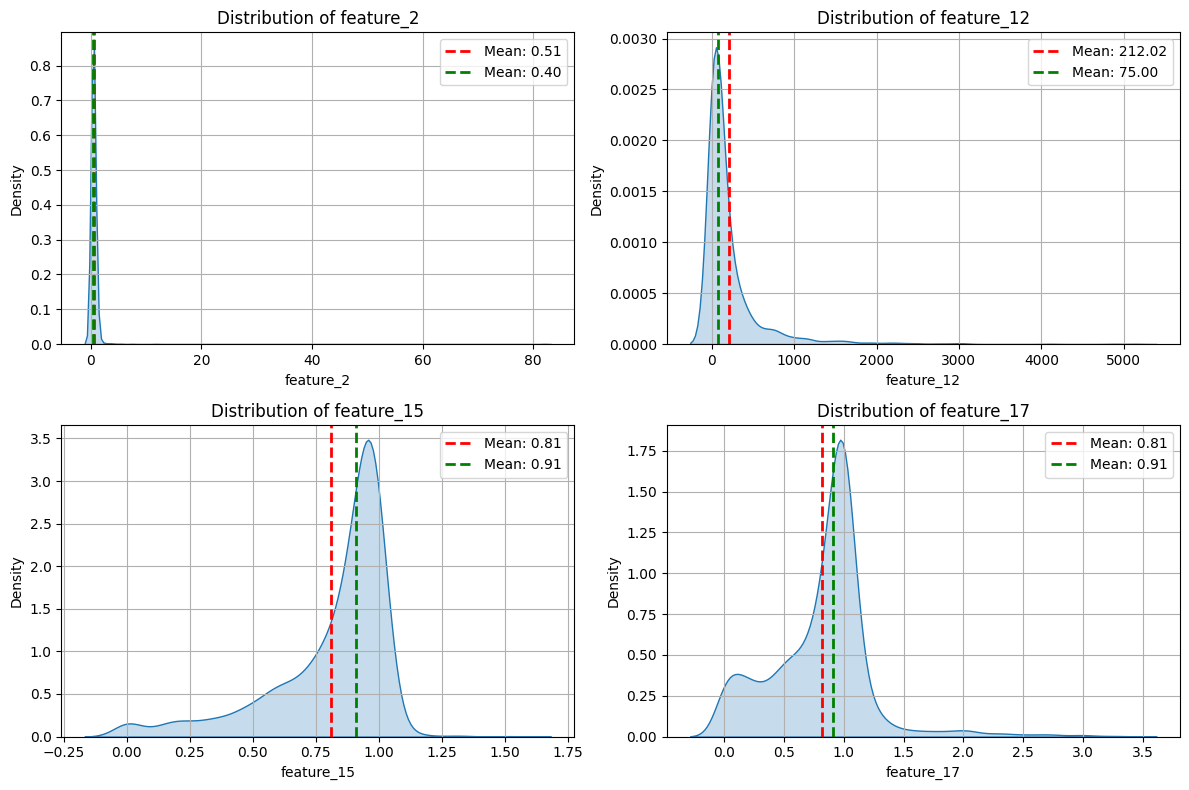

In [10]:
features = ['feature_2', 'feature_12', 'feature_15', 'feature_17']
features_set = set(features)  # This will be used in other feature distribution visualisations

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    data = df[feature].dropna()
    mean_val = data.mean()
    median_val = data.median()
    
    sns.kdeplot(data=data, fill=True, ax=axes[i])
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {median_val:.2f}')
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

After filling with missing values:-

In [11]:
df_copy = df.copy()
df_copy.drop("feature_20", axis=1, inplace=True)
features = ['feature_2', 'feature_12', 'feature_15', 'feature_17']

for feature in features:
    median_val = df_copy[feature].median()
    df_copy[feature] = df_copy[feature].fillna(median_val)


df_copy.isna().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
target        0
dtype: int64

In [12]:
#   An overall analysis after imputation of missing values
df_copy.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,target
count,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,...,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000
mean,2143.140598,4895.370009,0.505151,40.177331,1639.413176,0.331810,2109.659059,4018.601682,14.537477,833.395627,...,688.128637,101.693916,-121.241584,1465.203318,-1627.283926,1616.717387,-4.453194,1046.008545,0.791885,0.510512
std,1490.510379,3156.514669,1.797285,69.023807,5426.383321,0.869413,5302.074168,16198.080113,17.704323,2718.994859,...,509.718511,94.880141,1130.273827,3480.433978,3030.093236,3033.112727,33.603560,1561.206225,11.741618,0.500004
min,350.000000,0.000000,0.054277,0.000000,-48077.420000,0.000000,0.000000,0.000000,0.000000,-3562.155714,...,0.000000,0.000000,-10433.343333,-5079.890000,-78936.600000,0.000000,-313.907877,0.000000,-453.509174,0.000000
25%,1177.146095,3032.491131,0.306860,12.750000,-113.512500,0.000000,44.187500,0.000000,1.000000,152.458049,...,378.392797,55.512071,-282.967500,205.957500,-1858.075000,437.211295,-6.397878,384.738228,0.730783,0.000000
50%,1760.690631,4082.421071,0.396336,23.000000,1312.400000,0.000000,500.000000,0.000000,6.000000,390.791319,...,555.499677,77.775521,-11.876667,737.775000,-830.950000,896.971389,-0.635175,635.632289,1.103827,1.000000
75%,2676.163490,5922.719048,0.509270,43.000000,3437.142500,0.000000,2023.875000,3340.887500,22.000000,858.508516,...,836.195436,111.518294,168.065000,1656.902500,-333.292500,1759.842678,3.371751,1135.137564,1.574990,1.000000
max,22070.327000,29396.960000,82.047383,1390.000000,61062.700000,11.000000,102337.600000,429995.800000,61.000000,68649.158022,...,7501.395714,1930.985775,22958.960000,78587.490000,2139.220000,78945.797495,475.505178,35478.671659,73.632254,1.000000


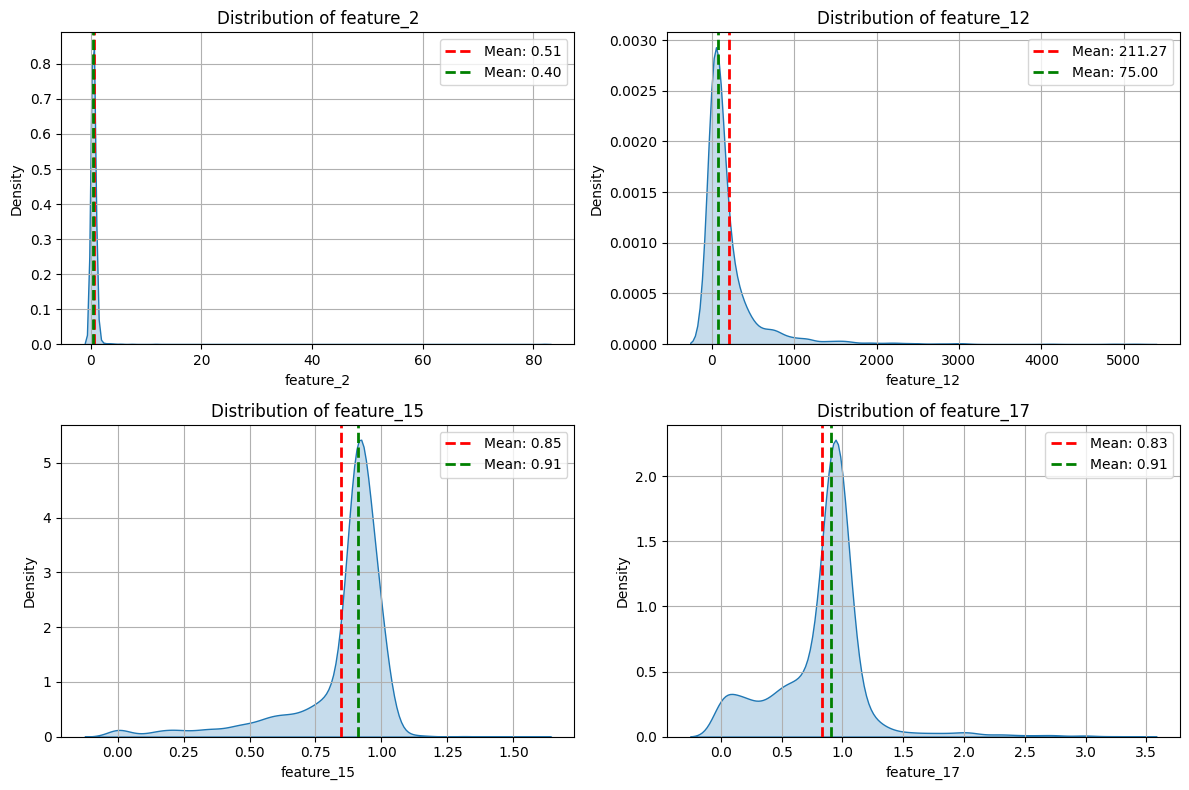

In [13]:
#   The distributions remain almost same even after filling the missing values
#   Also, only these 4 columns are the one that could have changed during filling missing values. Rest of the columns
#   will remain unaffected by this step

features = ['feature_2', 'feature_12', 'feature_15', 'feature_17']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    data = df_copy[feature]
    mean_val = data.mean()
    median_val = data.median()
    
    sns.kdeplot(data=data, fill=True, ax=axes[i])
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {median_val:.2f}')
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

#### Visualising numerical features:-

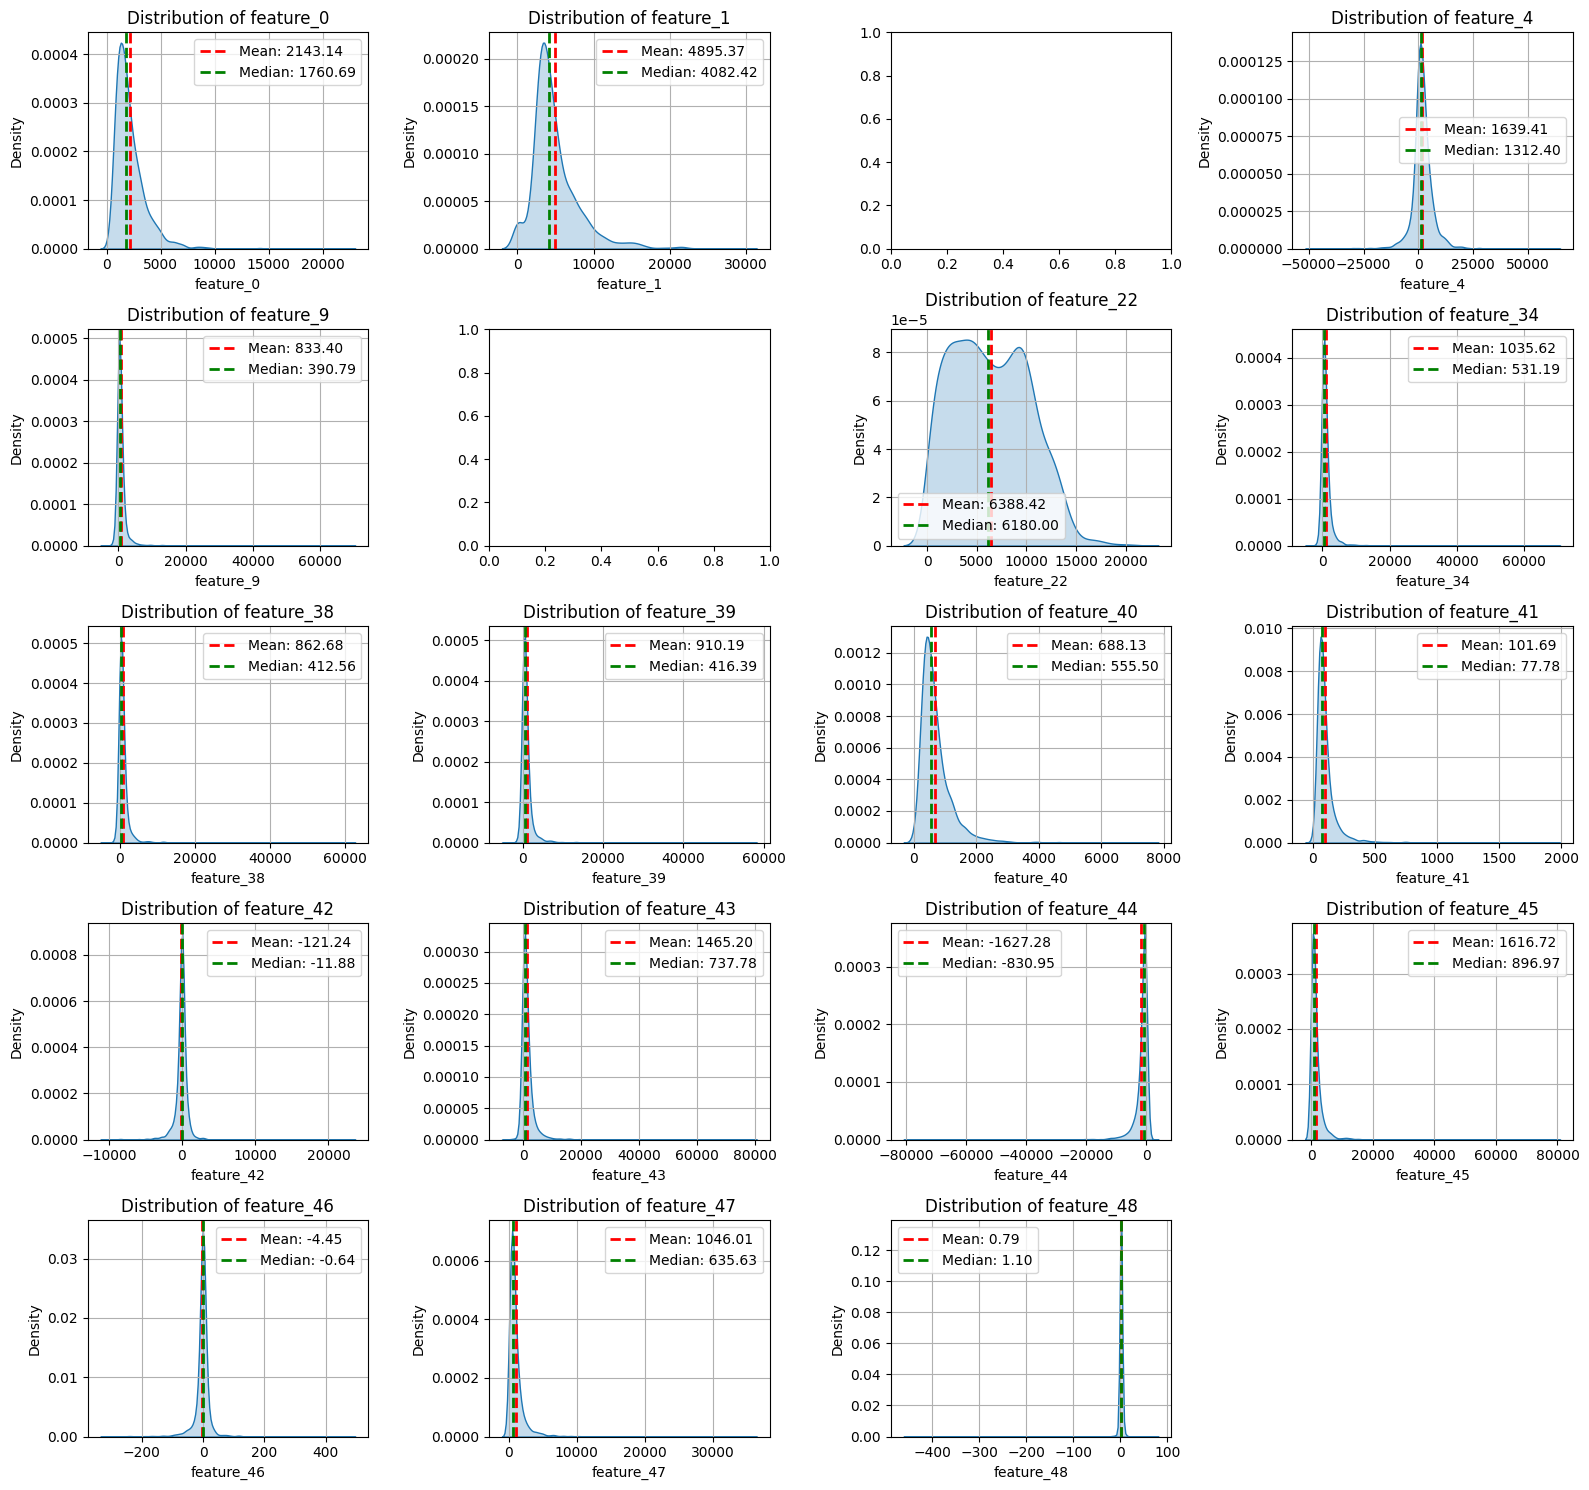

In [14]:
num_features = [ele[1] for ele in num_columns]

n_features = len(num_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    if feature not in features_set:
        data = df[feature].dropna()
        mean_val = data.mean()
        median_val = data.median()

        sns.kdeplot(data=data, fill=True, ax=axes[i])
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].grid(True)
        axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Visualising other features:-

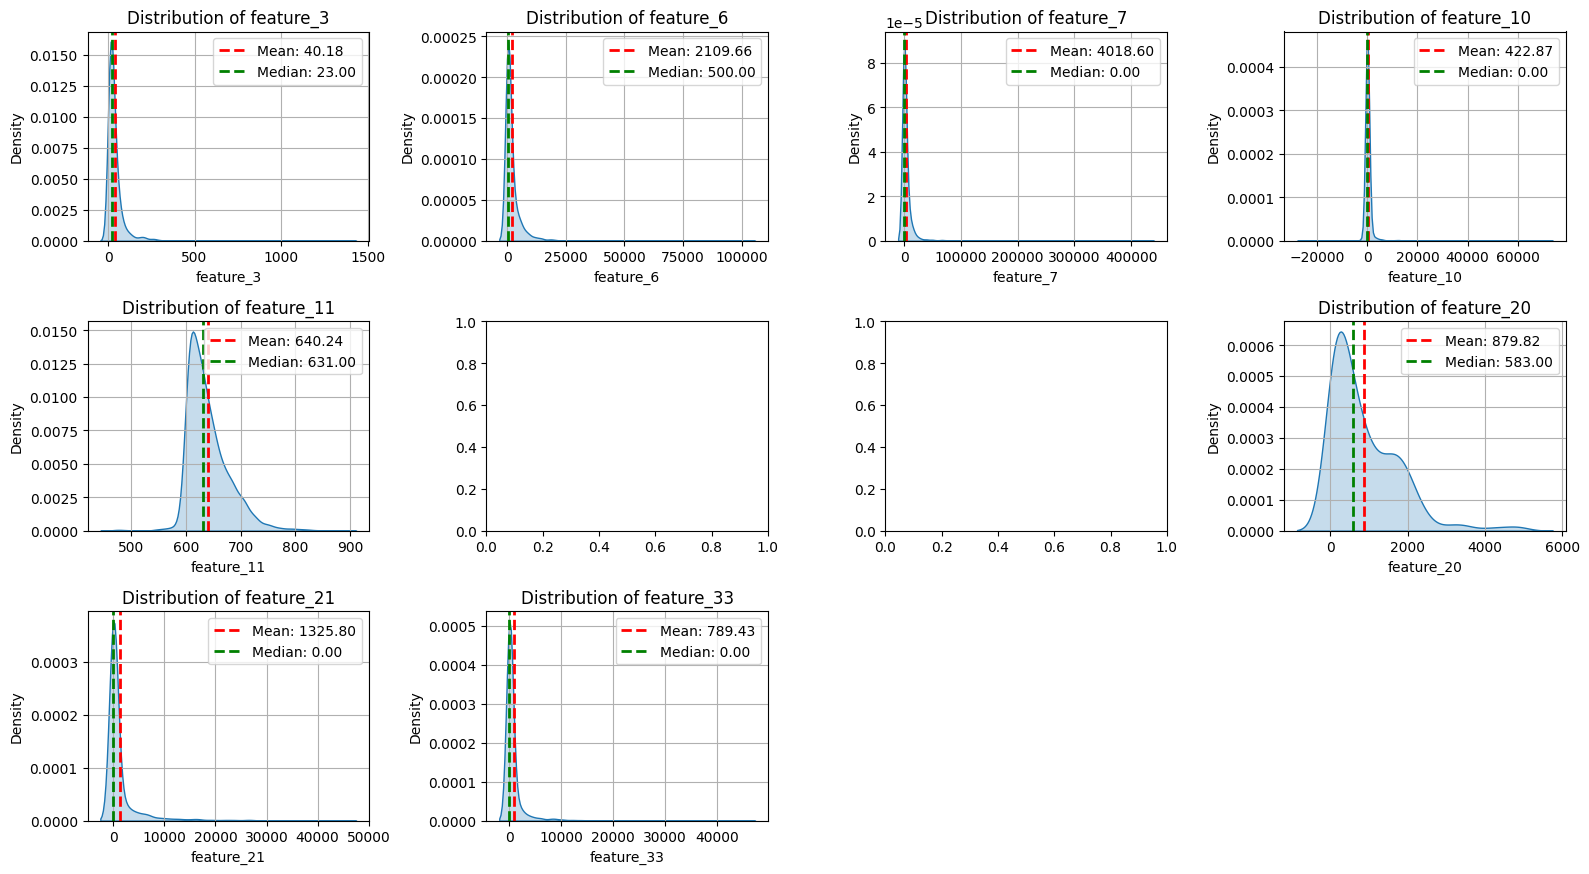

In [15]:
oth_features = [ele[1] for ele in oth_columns]

n_features = len(oth_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(oth_features):
    if feature not in features_set:
        data = df[feature].dropna()
        mean_val = data.mean()
        median_val = data.median()

        sns.kdeplot(data=data, fill=True, ax=axes[i])
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].grid(True)
        axes[i].legend()


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Visualising categorical features:-

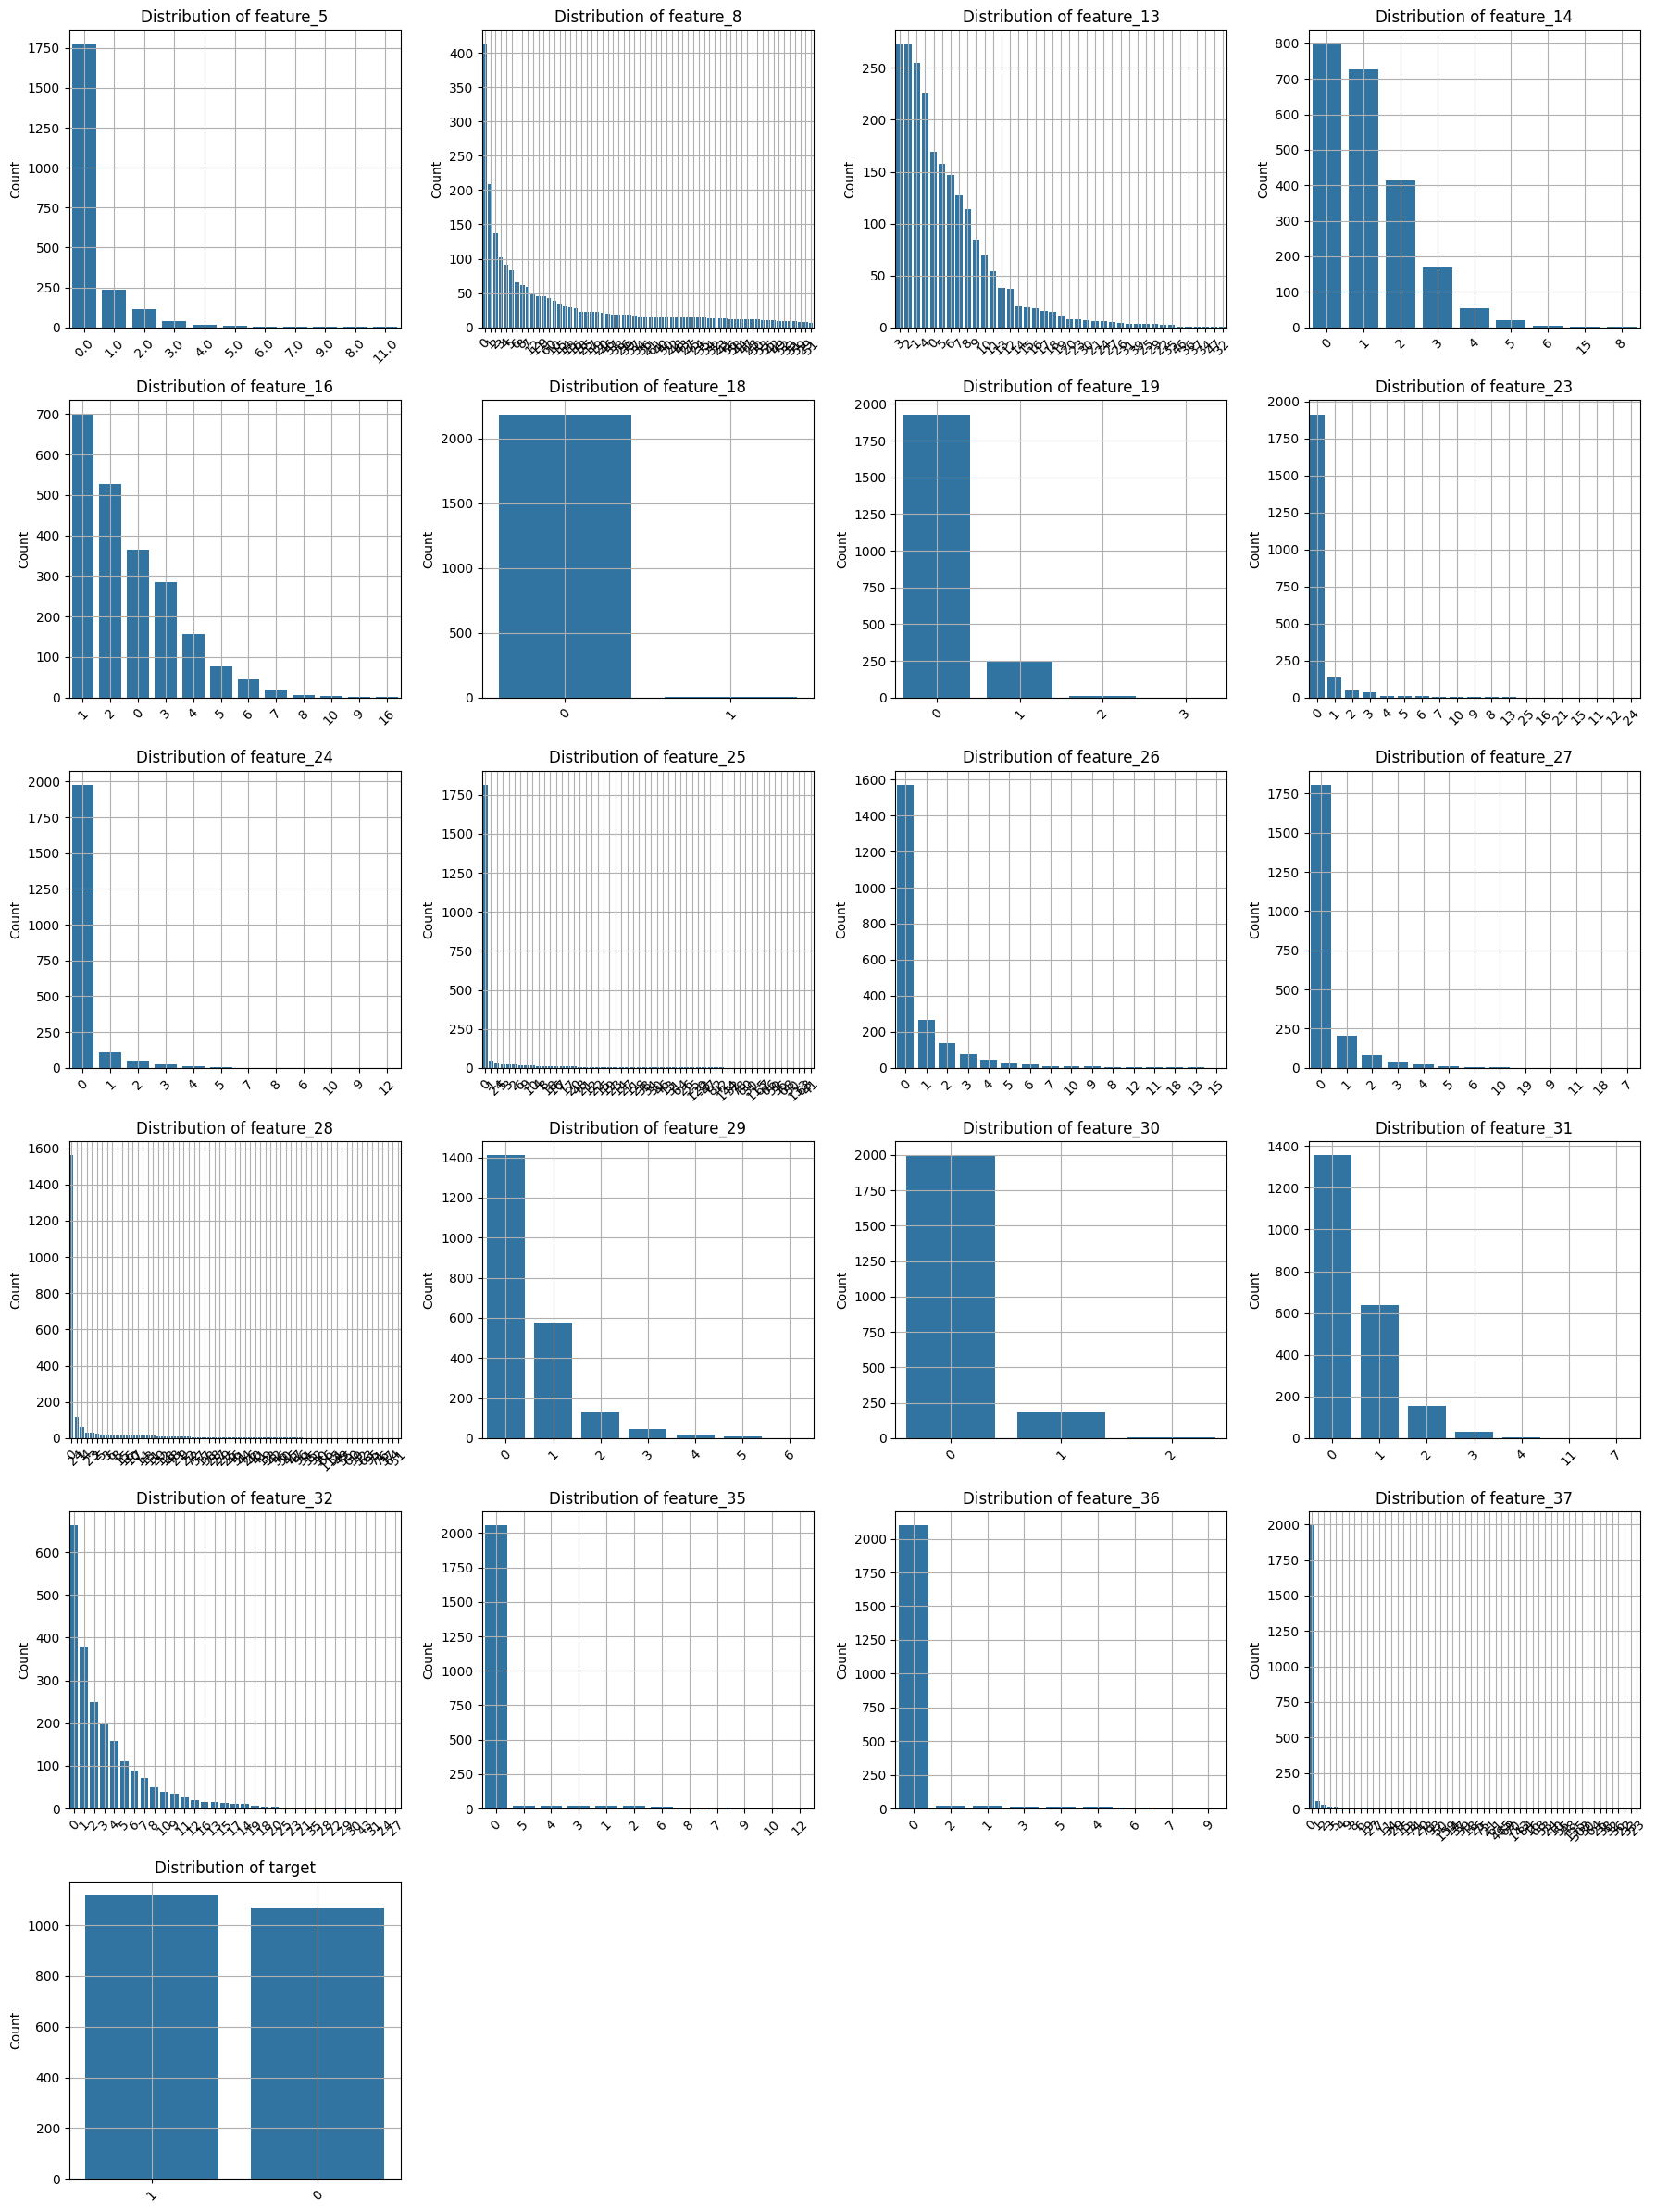

In [16]:
cat_features = [ele[1] for ele in cat_columns]

n_features = len(cat_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4.5, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    ax = axes[i]
    
    sns.countplot(data=df, x=feature, ax=ax, order=df[feature].value_counts().index)
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Conclusion:-
1. Some features (feature_2, feature_12, feature_15, feature_17, feature_6, feature_7, feature_9, feature_38, feature_39, feature_42, feature_43, feature_44, feature_46) are highly skewed. Can use a transformation (eg: Yeo-Johnson transformation to re-define the distribution). NOTE: Log transform or Z-score transforms won't work bcz these features contain negative values as well and also would fail to reduce skewness
2. After this, need to standardize the data for better performance
3. For categorical features, Low-cardinality features: Use one-hot encoding, High-cardinality features: Use frequency encoding.

#### Correlation analysis before transformations:-

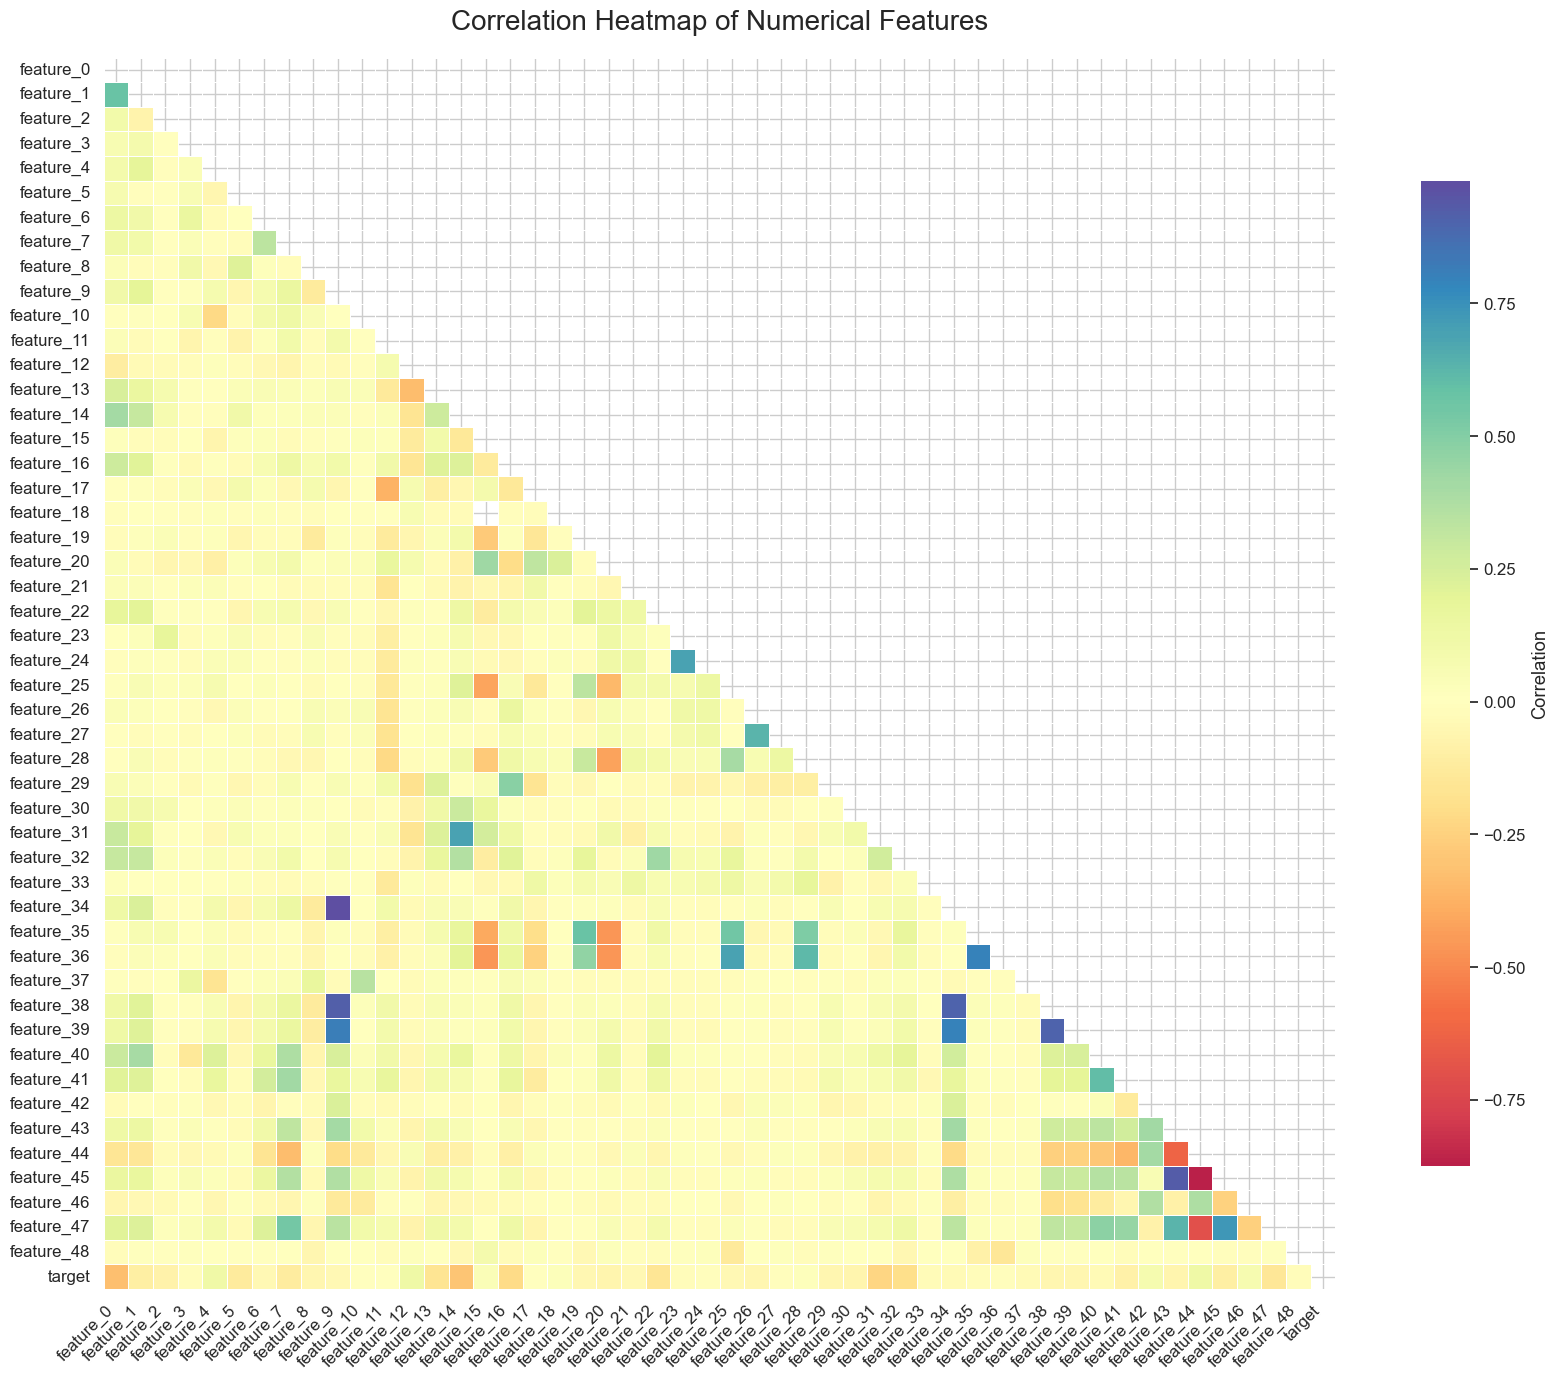

In [17]:
corr_matrix = df_copy.corr(numeric_only=True)

# Set up the matplotlib figure
corr = df.corr(numeric_only=True)

# Set figure size and styling
plt.figure(figsize=(18, 14))
sns.set(font_scale=1.1)
sns.set_style("whitegrid")

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    cmap='Spectral',
    annot=False,
    fmt=".2f",
    linewidths=0.6,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    square=True,
    center=0,
    annot_kws={"size": 9}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- A few feature pairs (e.g., feature_34 with feature_47, feature_38 with feature_33) show high positive or negative correlation
- Identify feature pairs with |correlation| > 0.8. For such pairs, consider: Dropping one of them (use Variance Inflation Factor to decide)

### Distribution of selected features after transformation

In [18]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=42)

In [19]:
#   qt_features consist of only (numerical + other) features. No categorical features present
qt_features = ['feature_2', 'feature_12', 'feature_15', 'feature_17', 'feature_6', 'feature_7', 'feature_9', 'feature_38', 'feature_39', 'feature_42', 'feature_43', 'feature_44', 'feature_46', 'feature_0', 'feature_1', 'feature_3', 'feature_4', 'feature_10', 'feature_21', 'feature_33', 'feature_34', 'feature_40', 'feature_41', 'feature_45', 'feature_47']
qt_transformed = pd.DataFrame(qt.fit_transform(df_copy[qt_features]),
                              columns=[f for f in qt_features])

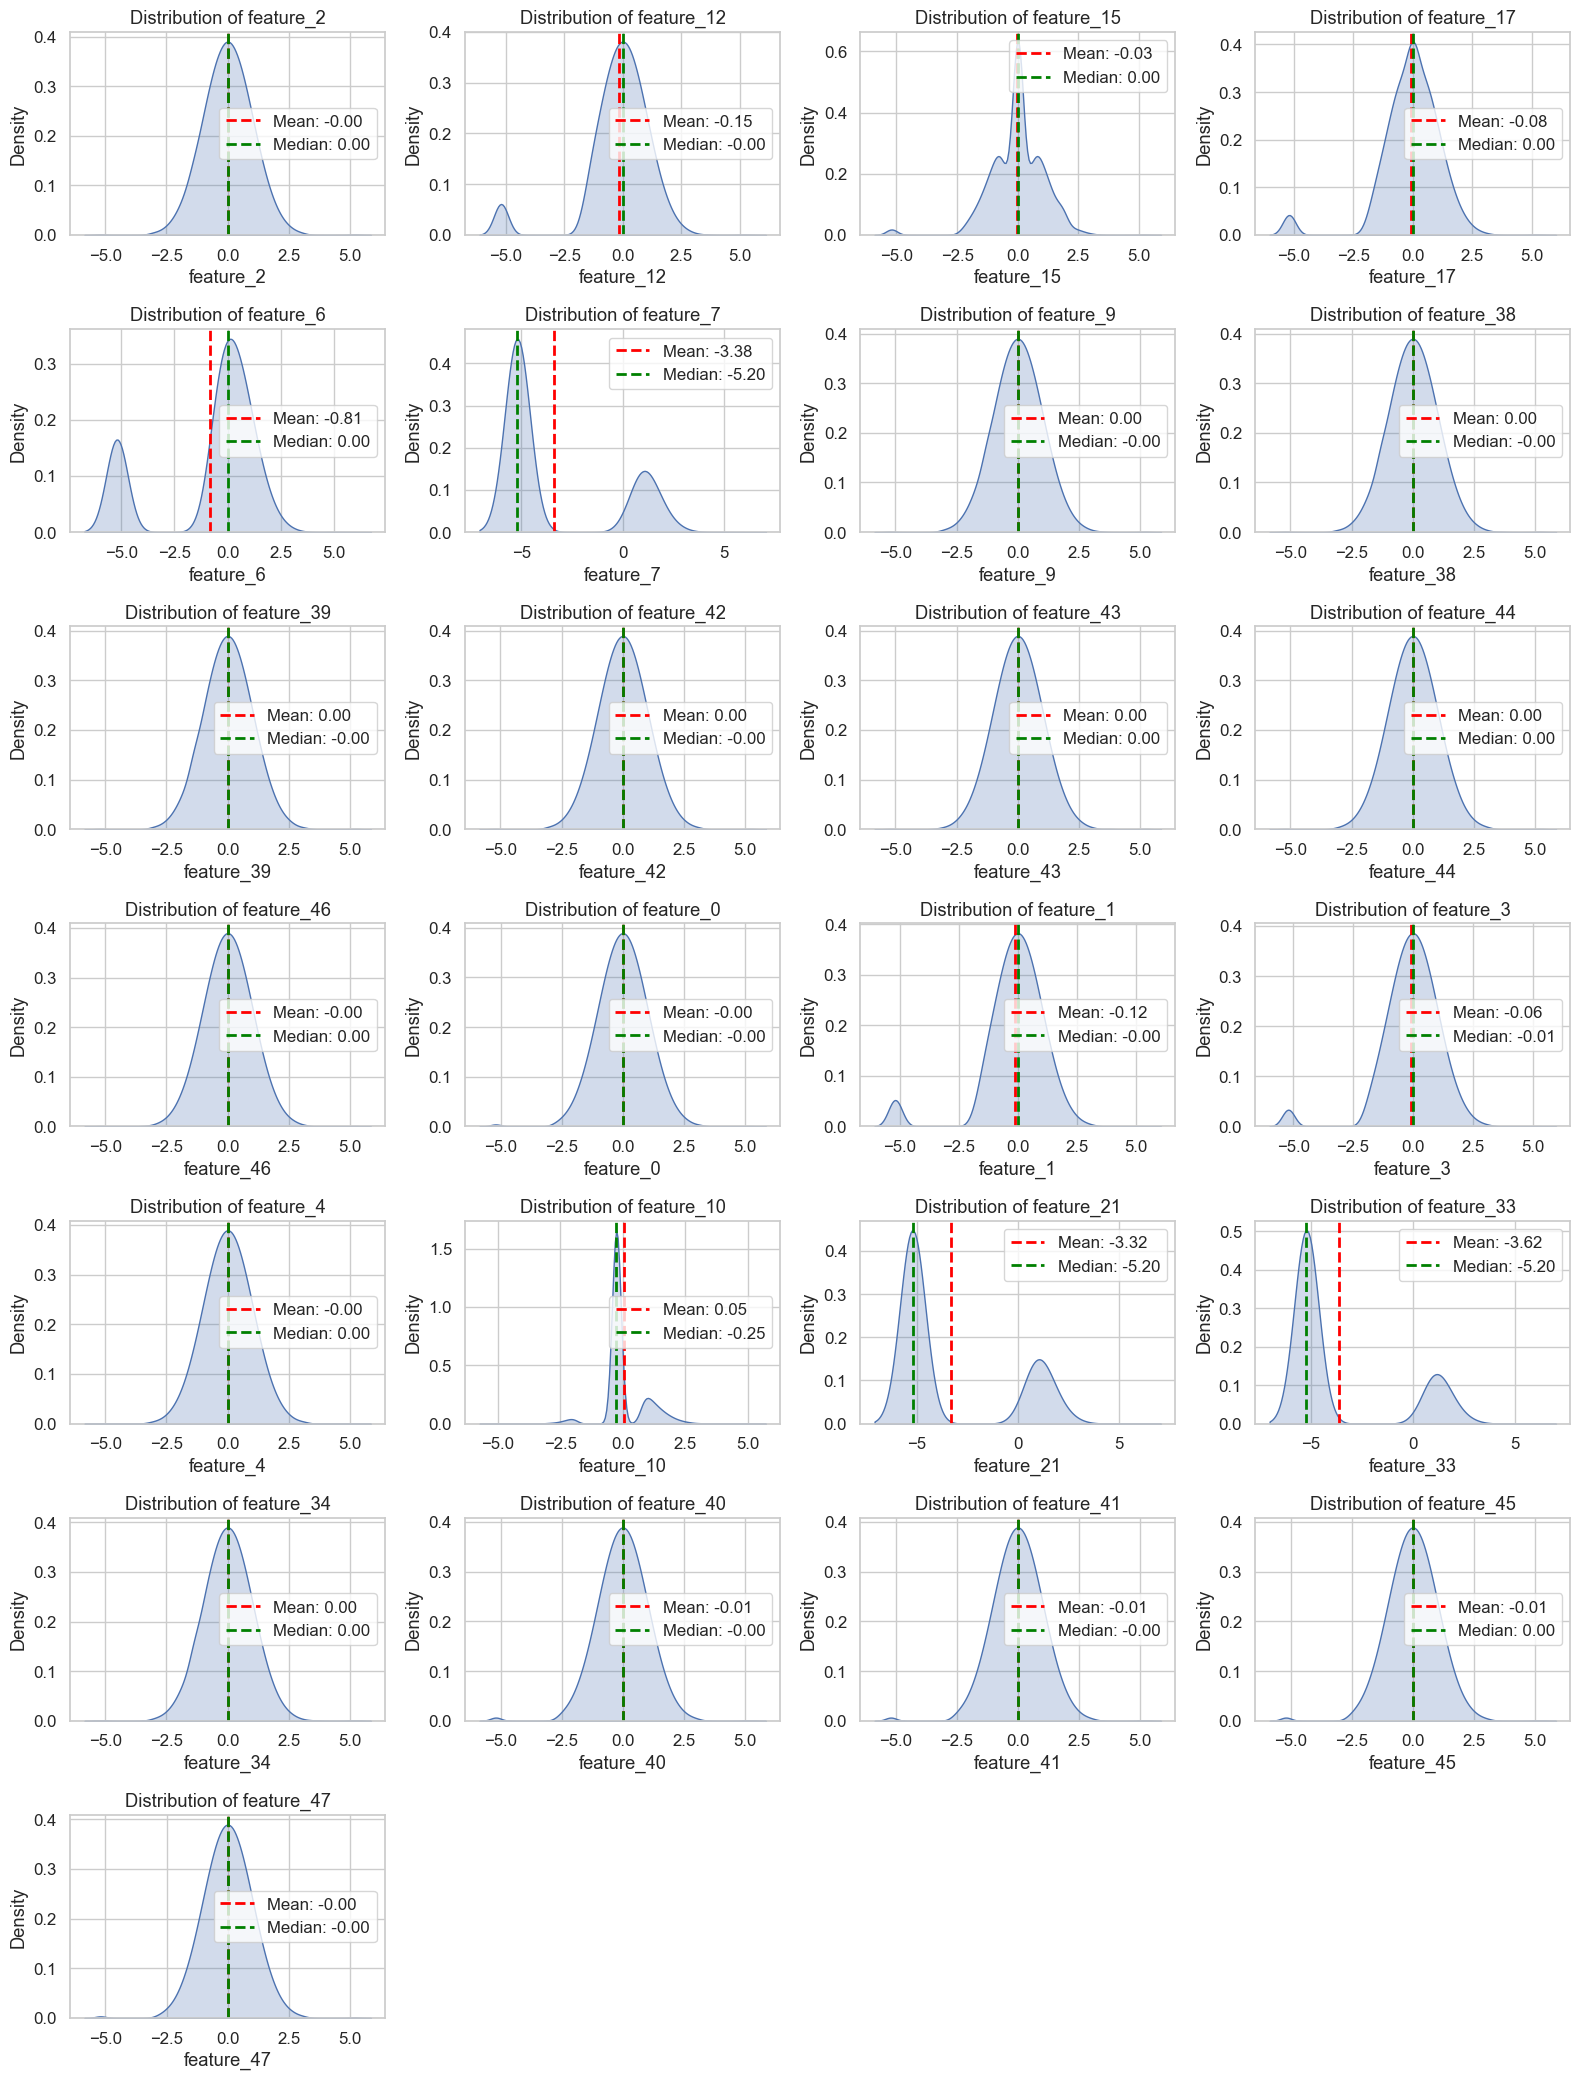

In [20]:
n_features = len(qt_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(qt_features):
    # if feature not in features_set:
    data = qt_transformed[feature]
    mean_val = data.mean()
    median_val = data.median()

    sns.kdeplot(data=data, fill=True, ax=axes[i])
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].grid(True)
    axes[i].legend()


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Distribution of selected features before transformtion

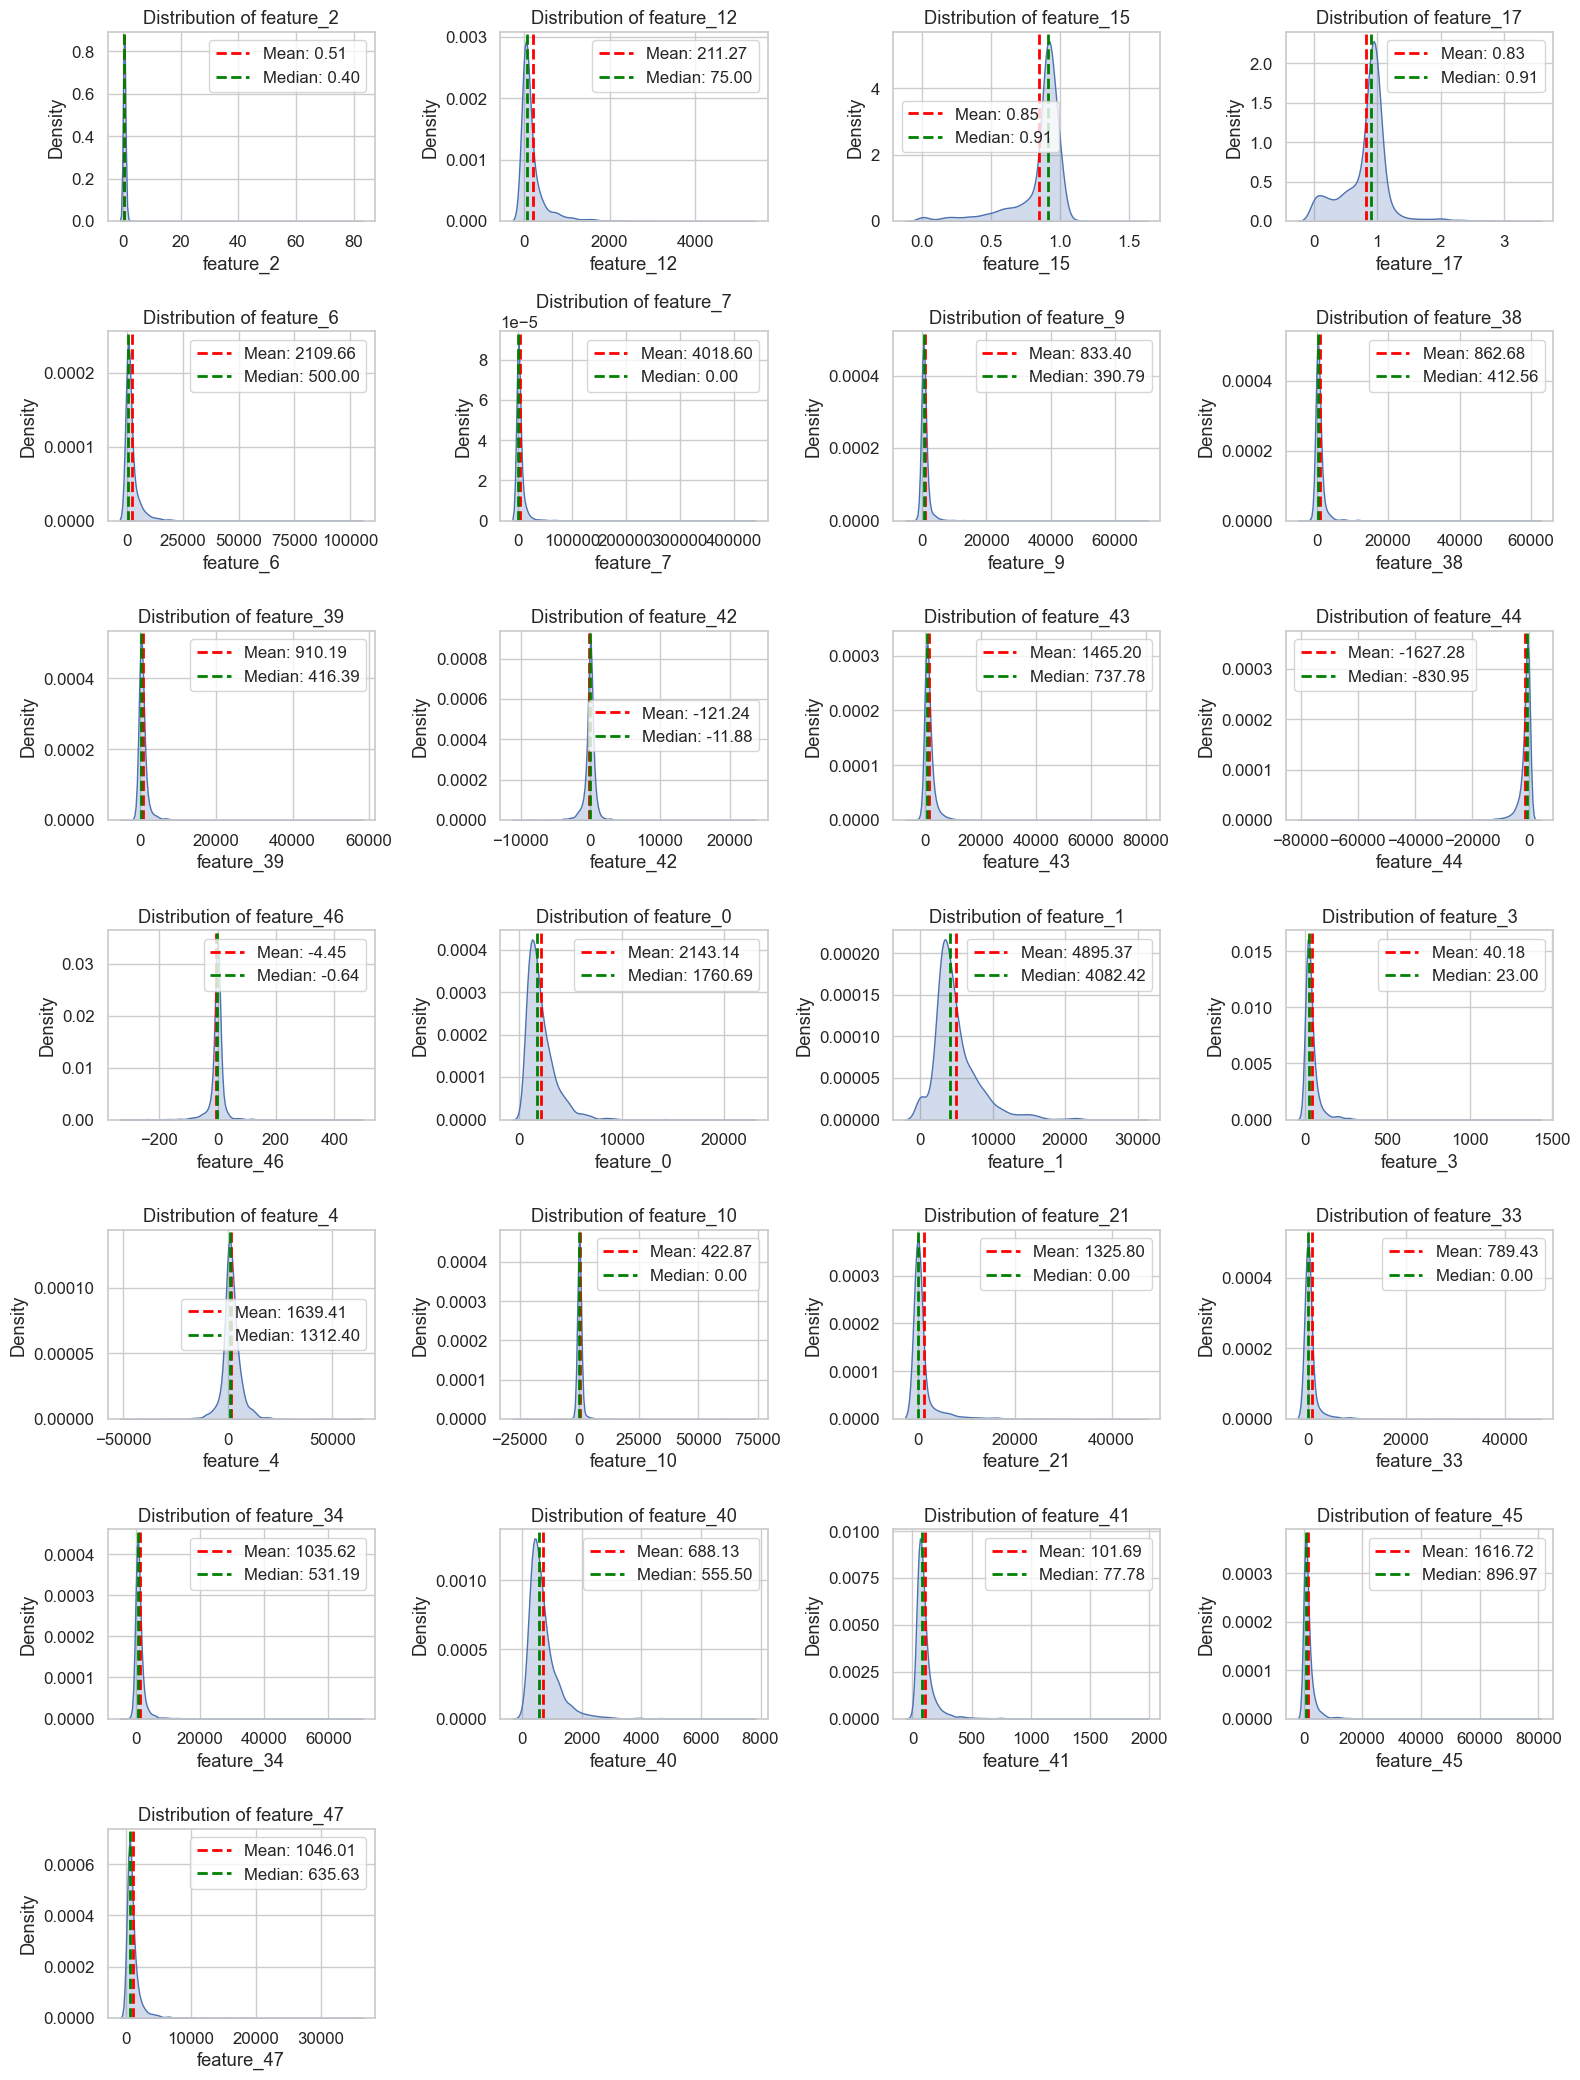

In [21]:
n_features = len(qt_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(qt_features):
    # if feature not in features_set:
    data = df_copy[feature]
    mean_val = data.mean()
    median_val = data.median()

    sns.kdeplot(data=data, fill=True, ax=axes[i])
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].grid(True)
    axes[i].legend()


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### what are the remaining (other+numerical) features remaining (These features are not that skewed, and thus dont need transformation)

In [22]:
num_and_oth_feat = []

for col_name in df_copy.columns:
    if col_name not in qt_features and col_name not in cat_features:
        num_and_oth_feat.append(col_name)

print(num_and_oth_feat)

['feature_11', 'feature_22', 'feature_48']


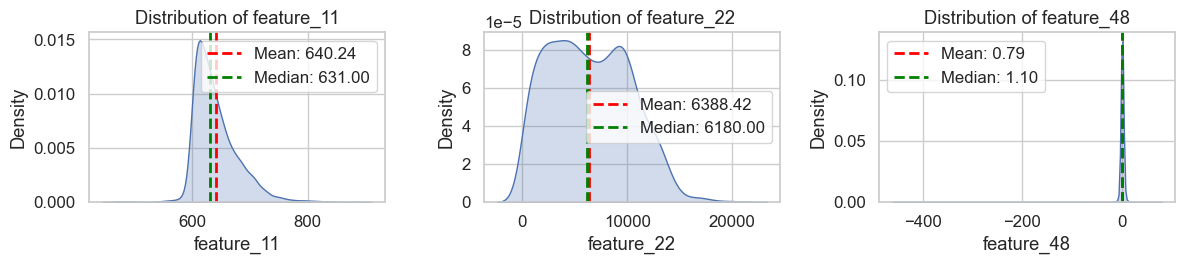

In [23]:
#   And the distribution of these features:-

n_features = len(num_and_oth_feat)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(num_and_oth_feat):
    # if feature not in features_set:
    data = df_copy[feature]
    mean_val = data.mean()
    median_val = data.median()

    sns.kdeplot(data=data, fill=True, ax=axes[i])
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].grid(True)
    axes[i].legend()


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Transforming Categorical columns

In [24]:
cat_features.pop()  #   Removing the 'target

'target'

In [25]:
len(cat_features)

20

In [26]:
#1.    There are only 7 features with classes more than 19
        # feature_8
        # feature_13
        # feature_25
        # feature_28
        # feature_32
        # feature_37

#2.    There are only 7 features with classes between (5, 20)
        # feature_5
        # feature_16
        # feature_23
        # feature_24
        # feature_26
        # feature_27
        # feature_35

#3.   All the remaining features have classes <= 5
        # feature_5
        # feature_14
        # feature_16
        # feature_23
        # feature_24
        # feature_26
        # feature_27
        # feature_29
        # feature_31
        # feature_35
        # feature_36


#       Analysing case 3
for col_name in cat_features:
    if df_copy[col_name].nunique() <= 5:
        print(df_copy[col_name].value_counts())
        print('-'*30)

feature_18
0    2186
1       2
Name: count, dtype: int64
------------------------------
feature_19
0    1929
1     246
2      12
3       1
Name: count, dtype: int64
------------------------------
feature_30
0    2000
1     183
2       5
Name: count, dtype: int64
------------------------------


#### Transformation of categorical features:-

For transforming categorical features, we take up the following strategy:-
1. For case 3 where the no. of classes for a feature is less than or equal to 5, we will perform `one-hot-encoding`.
2. For both case 1 and 2, we cant perform one-hot encoding for all the classes, since this would make the data very huge as well as sparse. In such cases, we do the following:-
   - For the top 3 classes (classes where most data falls), we perform one-hot encoding (this will cover majority of the data points) - Refer to the data distribution plot of categorical features
   - All the remaining classes will fall into 1 single category and will occupy a single column, no matter their value. So all these features will add a total of 4 total columns


In [27]:
#   Here we had a look at the binary features. Binary features have 0 and 1 has labels. And there is just a single binary feature
for col_name in cat_features:
    if df_copy[col_name].nunique() == 5:
        print(df_copy[col_name].value_counts())
        print('-'*30)

In [28]:
def encode_categorical_features(df_copy, cat_features):
    encoded_parts = []

    for col in cat_features:
        unique_vals = df_copy[col].nunique()
        val_counts = df_copy[col].value_counts()

        # Binary feature
        if unique_vals == 2:
            encoded_parts.append(df_copy[[col]])

        # other classes with num_classes <= 5
        elif unique_vals <= 5:
            ohe_df = pd.get_dummies(df_copy[col], prefix=col, drop_first=True)
            encoded_parts.append(ohe_df)

        # remaining case
        else:
            top_classes = val_counts.index[:3]  # Top 3
            new_cols = pd.DataFrame()

            for cls in top_classes:
                new_cols[f"{col}_{cls}"] = (df_copy[col] == cls).astype(int)

            new_cols[f"{col}_Other"] = (~df_copy[col].isin(top_classes)).astype(int)
            encoded_parts.append(new_cols)

    # Create a new dataframe for the same
    cat_encoded_df = pd.concat(encoded_parts, axis=1)

    return cat_encoded_df


#   Processing the 20 categorical columns adds 74 columns, an increment of 54 new columns to the exisiting df
cat_encoded_df = encode_categorical_features(df_copy, cat_features)
print(cat_encoded_df.shape)

(2188, 74)


In [29]:
cat_encoded_df.head()

,feature_5_0.0,feature_5_1.0,feature_5_2.0,feature_5_Other,feature_8_0,feature_8_1,feature_8_2,feature_8_Other,feature_13_3,feature_13_2,...,feature_35_4,feature_35_Other,feature_36_0,feature_36_2,feature_36_1,feature_36_Other,feature_37_0,feature_37_1,feature_37_2,feature_37_Other
0,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0


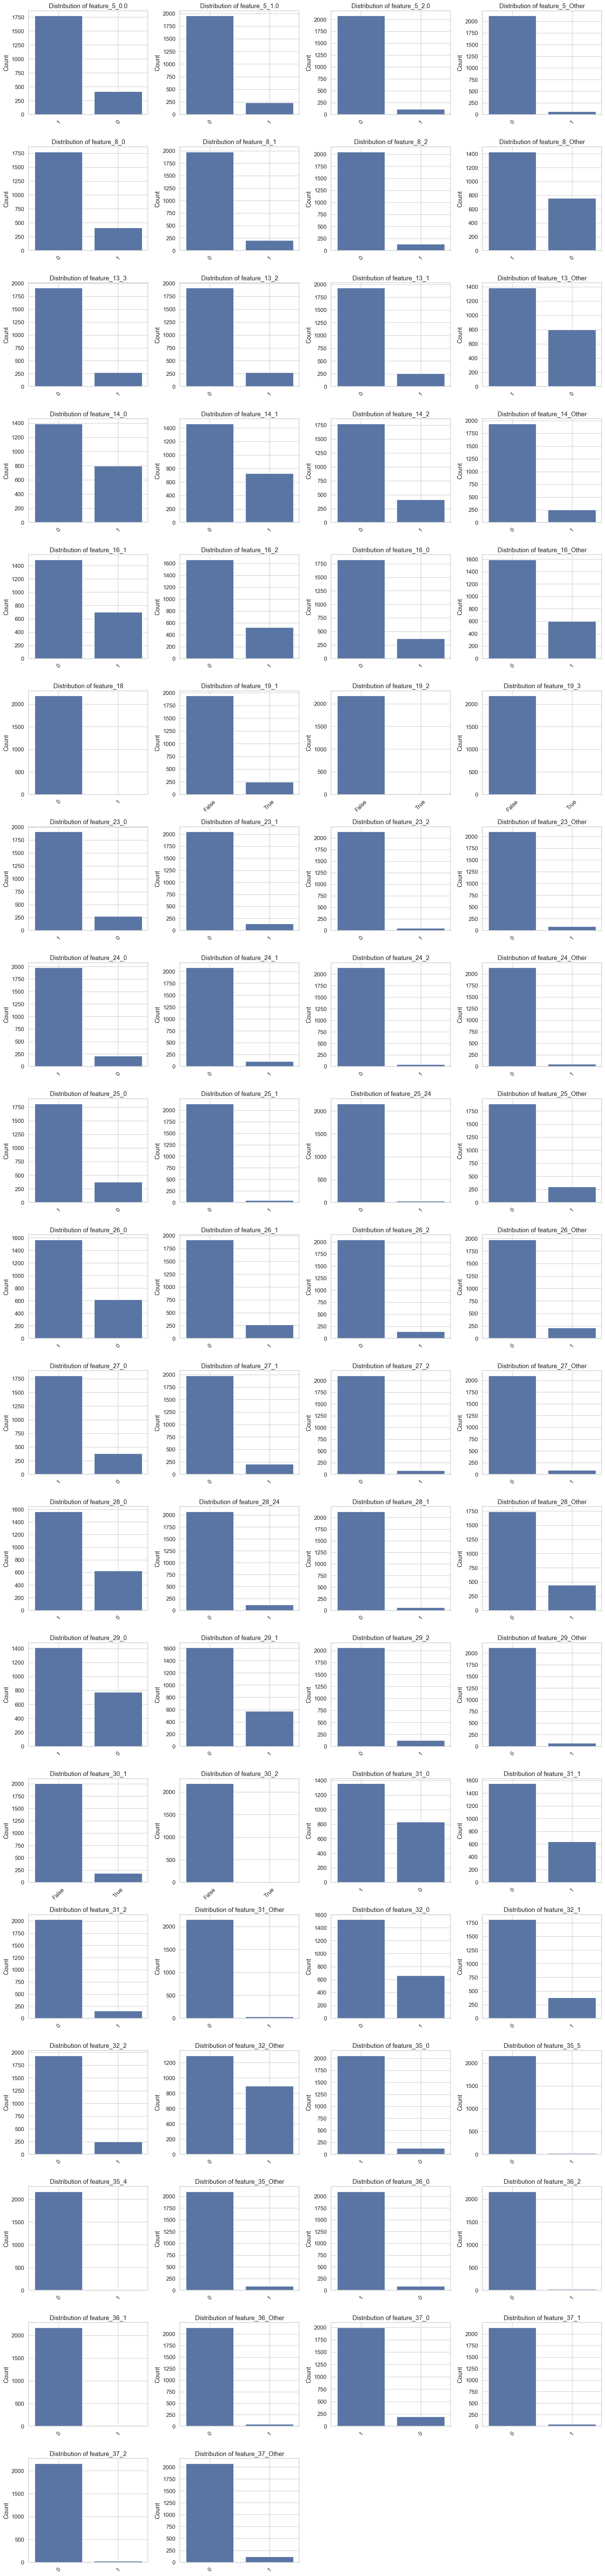

In [30]:
#   Visualising them after transformation
#   Now, the distribution looks good

n_features = len(cat_encoded_df.columns)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4.5, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(cat_encoded_df.columns):
    ax = axes[i]
    
    sns.countplot(data=cat_encoded_df, x=feature, ax=ax, order=cat_encoded_df[feature].value_counts().index)
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [31]:
print(num_and_oth_feat)

['feature_11', 'feature_22', 'feature_48']


In [32]:
num_and_oth_feat_2 = ['feature_11', 'feature_22', 'feature_48']
from sklearn.preprocessing import StandardScaler

def standardize_rem_features(df):
    unmodified_features = ['feature_11', 'feature_22', 'feature_48']

    scaler = StandardScaler()
    standardized = scaler.fit_transform(df[unmodified_features])
    
    standardized_df = pd.DataFrame(standardized, columns=unmodified_features, index=df.index)
    
    return standardized_df

In [33]:
final_df = pd.concat([cat_encoded_df, standardize_rem_features(df_copy[num_and_oth_feat_2]), qt_transformed, df['target']], axis=1)
print(final_df.shape)

(2188, 103)


In [34]:
# total should be 
# (including the target) 
print(f"Total cols including the target: {(49 - 20 + 74)}")

#   (excluding target)
print(f"Total cols excluding the target: {(49 - 1 - 20 + 74)}")

Total cols including the target: 103
Total cols excluding the target: 102


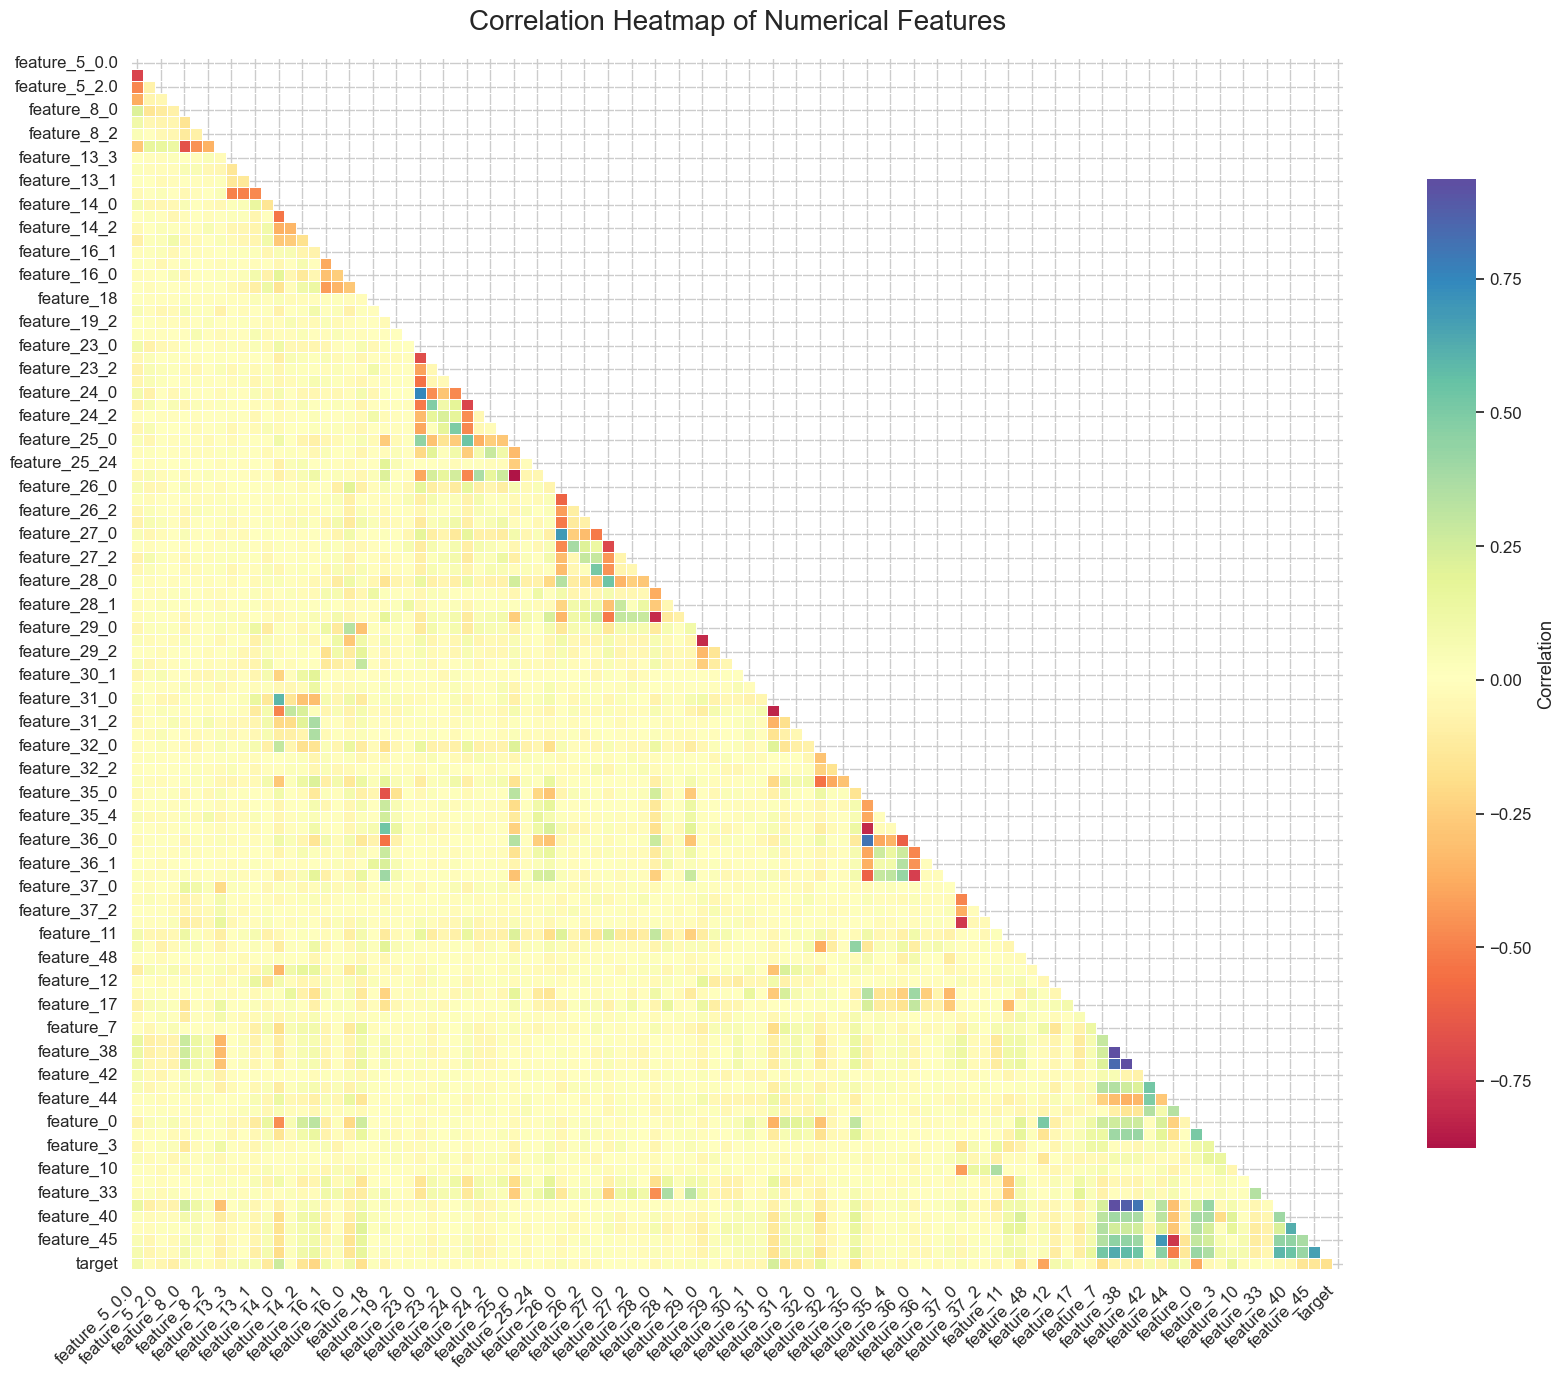

In [35]:
# Set up the matplotlib figure
corr = final_df.corr(numeric_only=True)

# Set figure size and styling
plt.figure(figsize=(18, 14))
sns.set(font_scale=1.1)
sns.set_style("whitegrid")

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    cmap='Spectral',
    annot=False,
    fmt=".2f",
    linewidths=0.6,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    square=True,
    center=0,
    annot_kws={"size": 9}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [36]:
corr_matrix = df.corr()
upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

high_corr_features = [
    (corr_matrix.index[i], corr_matrix.columns[j])
    for i in range(corr_matrix.shape[0])
    for j in range(corr_matrix.shape[1])
    if upper[i, j] and abs(corr_matrix.iat[i, j]) > 0.85 
]

print(high_corr_features)

[('feature_9', 'feature_34'), ('feature_9', 'feature_38'), ('feature_34', 'feature_38'), ('feature_38', 'feature_39'), ('feature_43', 'feature_45'), ('feature_44', 'feature_45')]


**Correlation Analysis:-**

- Most features have very low correlation among them.
- However, the above pair of features have a high correlation among them. So, after careful obsevation it is better to drop the `feature_38` and `feature_45`
- Notice that both are numerical or other feature (Not categorical)

In [ ]:
#   Drop feature_38 and feature_45 (high correlation features)
final_df.drop(['feature_38', 'feature_45'], axis=1, inplace=True)

In [37]:
final_df.describe()

,feature_5_0.0,feature_5_1.0,feature_5_2.0,feature_5_Other,feature_8_0,feature_8_1,feature_8_2,feature_8_Other,feature_13_3,feature_13_2,...,feature_4,feature_10,feature_21,feature_33,feature_34,feature_40,feature_41,feature_45,feature_47,target
count,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,...,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000
mean,0.810786,0.106490,0.051188,0.031536,0.188757,0.095521,0.062614,0.653108,0.124771,0.124771,...,-0.000036,0.047462,-3.320495,-3.623555,0.000303,-0.007375,-0.007267,-0.007413,-0.002933,0.510512
std,0.391768,0.308534,0.220432,0.174800,0.391405,0.294000,0.242323,0.476090,0.330535,0.330535,...,1.008716,0.824807,2.920853,2.795548,1.008380,1.037088,1.037051,1.037158,1.020244,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.675422,-0.253606,-5.199338,-5.199338,-0.674570,-0.674256,-0.675219,-0.674468,-0.674240,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000078,-0.253606,-5.199338,-5.199338,0.000493,-0.000207,-0.000465,0.000556,-0.000567,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.674396,-0.253606,0.673702,-5.199338,0.675137,0.674561,0.674719,0.674772,0.674443,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,1.000000


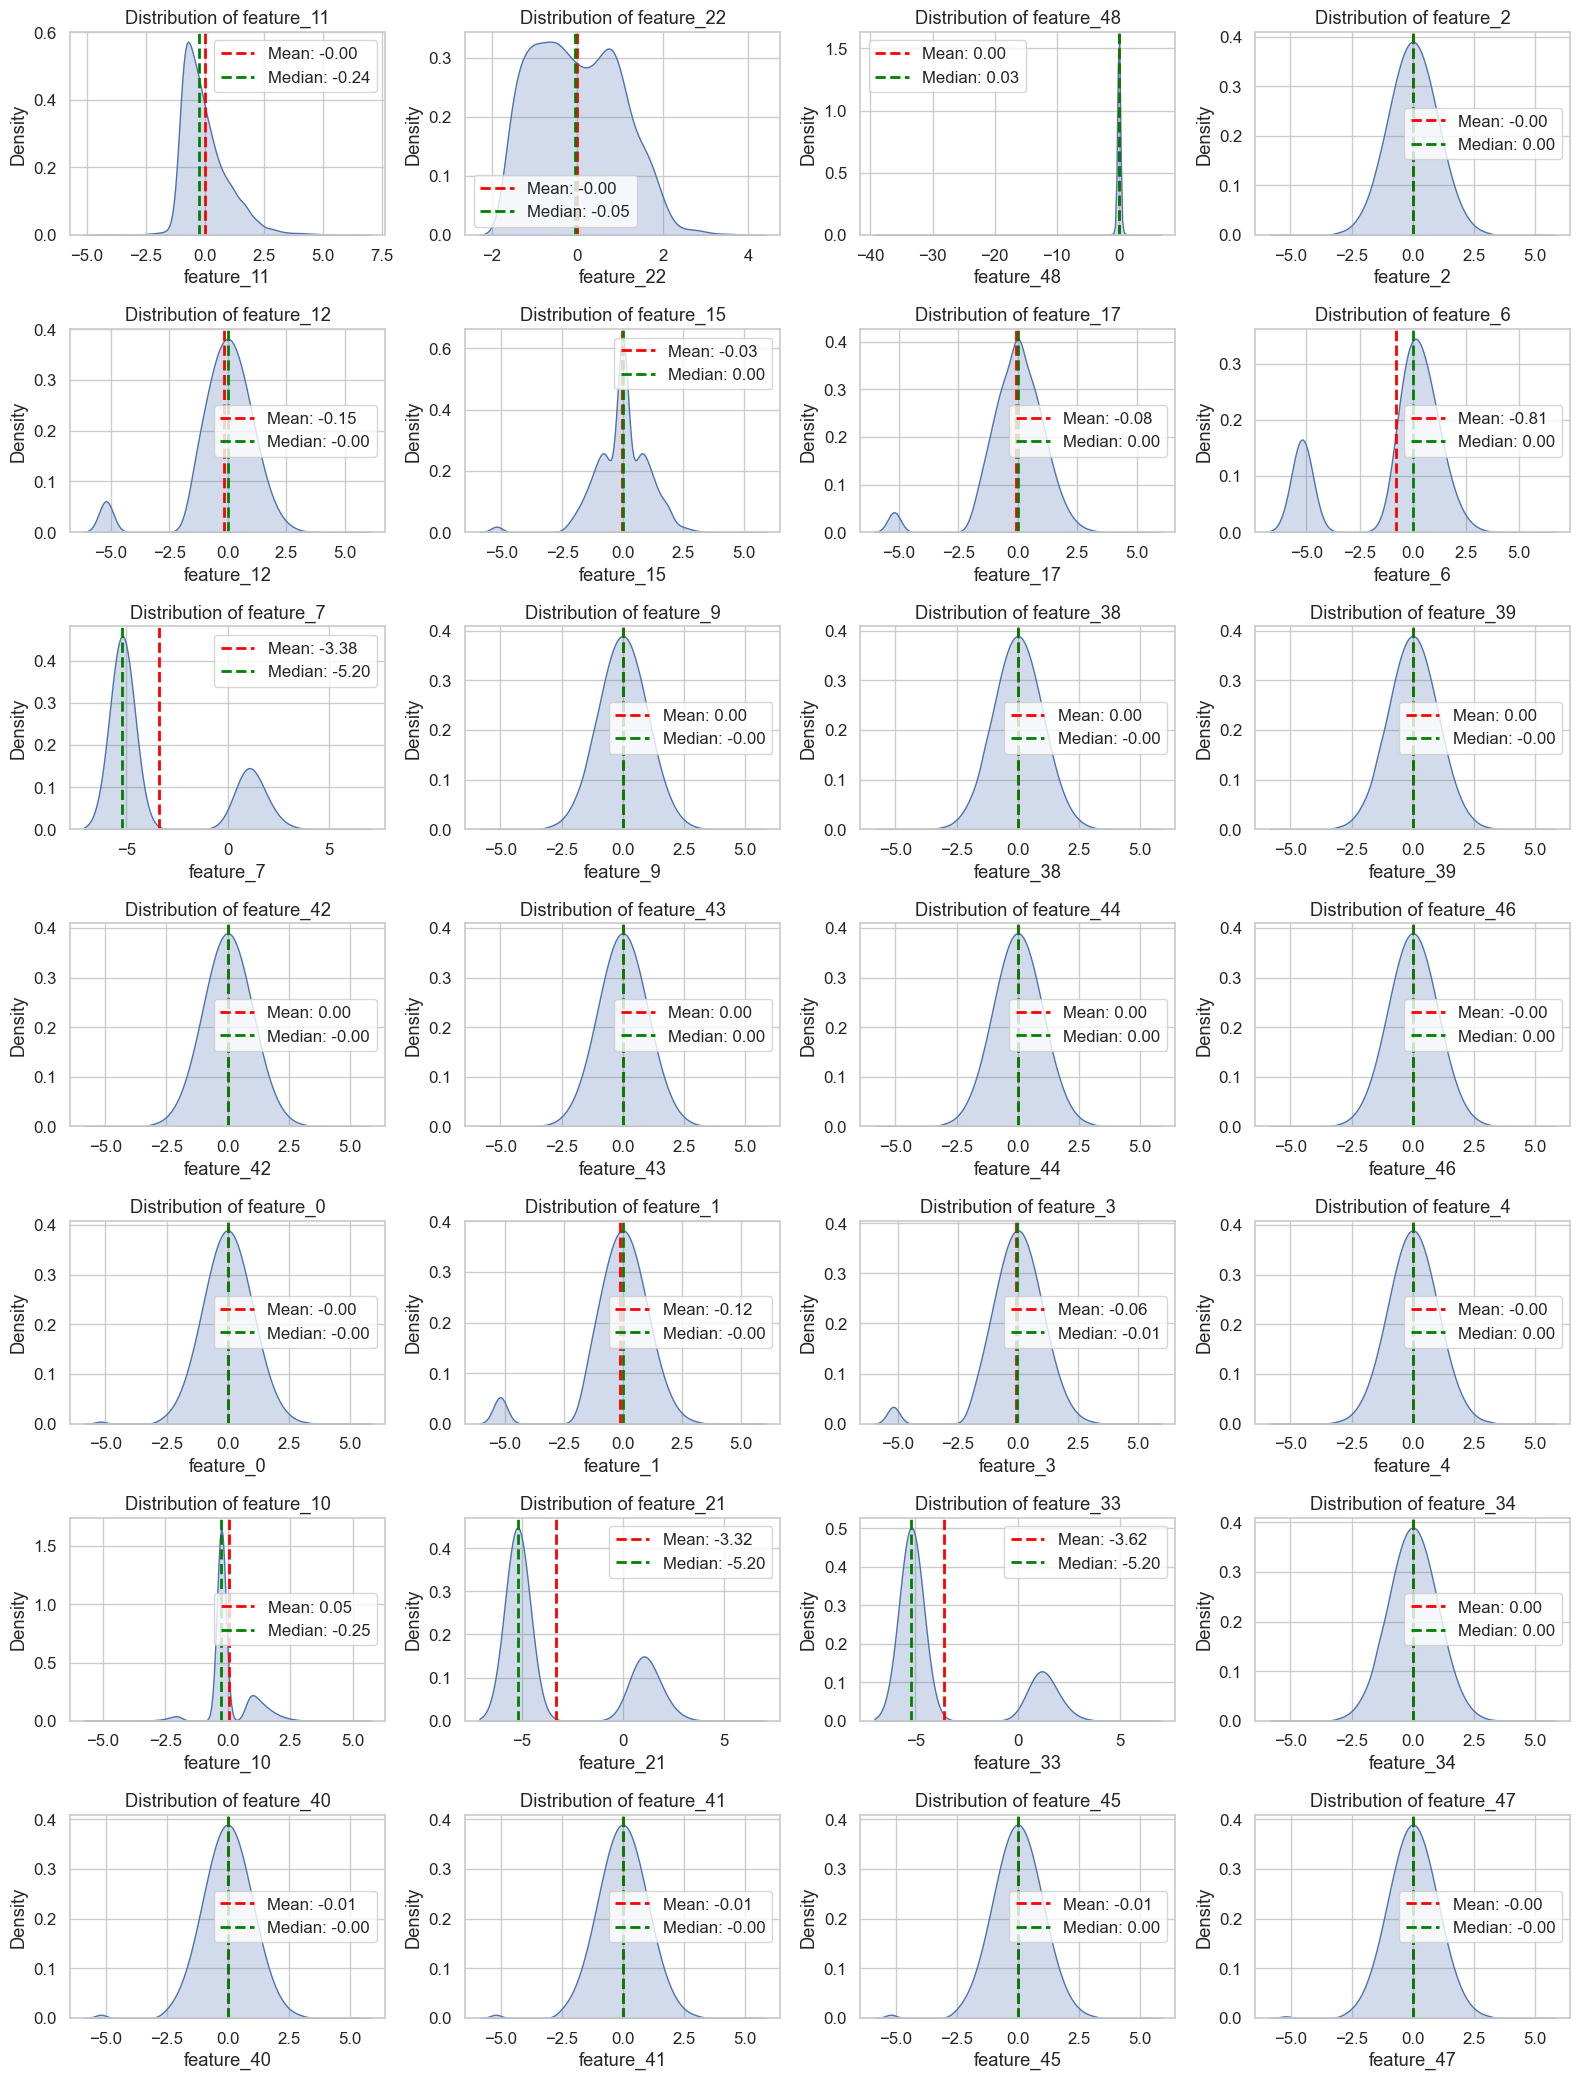

In [38]:
#   Distribution of transformed numerical features. They will now go into model fitting

num_and_oth_feat = [
    col for col in final_df.select_dtypes(include=['int64', 'float64']).columns
    if final_df[col].nunique() > 2
]

n_features = len(num_and_oth_feat)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(num_and_oth_feat):
    data = final_df[feature]
    mean_val = data.mean()
    median_val = data.median()

    sns.kdeplot(data=data, fill=True, ax=axes[i])
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

    axes[i].set_title(f'Distribution of {feature}')
    axes[i].grid(True)
    axes[i].legend()


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [39]:
#   Save the pre-processed dataframe
# final_df.to_csv()

### Now our data is complete and pre-processed. We will move into the modelling part

### Refer to the second notebook for detailed modelling experiments